In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from os.path import join

In [43]:
# Import data
harmonic = pd.read_csv(join('data', 'harmonic.csv'), skiprows=[0, 1, 2, 4])
quasistatic = pd.read_csv(join('data', 'quasistatic.csv'), skiprows=[0, 1, 2, 4])
quasistatic.head()

,Elapsed Time,Disp,Load 3
0,0.00,1.064,-7.61
1,0.01,1.065,-7.53
2,0.02,1.069,-7.50
3,0.03,1.074,-7.26
4,0.04,1.079,-6.67


In [47]:
# Remove spaces from column names
quasistatic.rename(columns=lambda x: x.strip(), inplace=True)
harmonic.rename(columns=lambda x: x.strip(), inplace=True)

In [46]:
quasistatic.loc[:, 'Elapsed Time']

0        0.00
1        0.01
2        0.02
3        0.03
4        0.04
        ...  
8536    85.36
8537    85.37
8538    85.38
8539    85.39
8540    85.40
Name: Elapsed Time, Length: 8541, dtype: float64

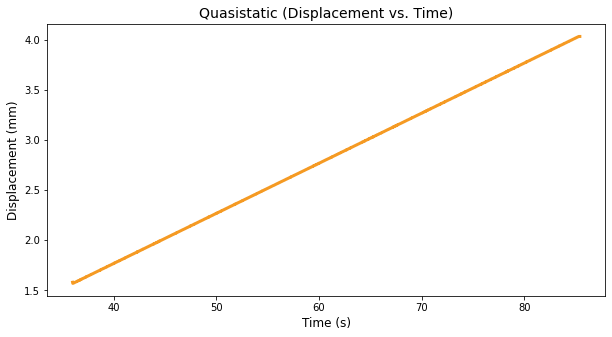

In [76]:
# Plot quasistatic data
fig = plt.figure(figsize=(10, 5))
plt.plot(
    quasistatic.loc[:, 'Elapsed Time'][3600:],
    quasistatic.loc[:, 'Disp'][3600:],
    color='#F59A23',
    linewidth=3
)
plt.xlabel('Time (s)', fontsize=12)
plt.ylabel('Displacement (mm)', fontsize=12)
plt.title('Quasistatic (Displacement vs. Time)', fontsize=14)
plt.show()

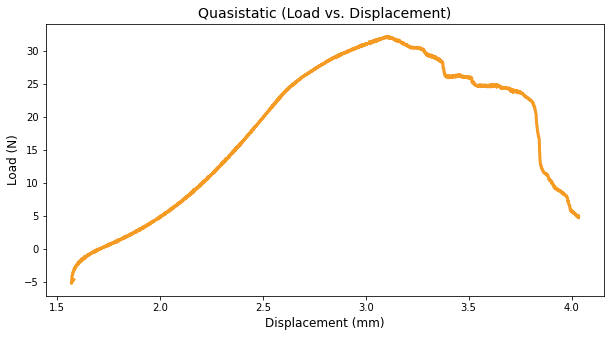

In [78]:
# Plot quasistatic data
fig = plt.figure(figsize=(10, 5))
plt.plot(
    quasistatic.loc[:, 'Disp'][3600:],
    quasistatic.loc[:, 'Load 3'][3600:],
    color='#F59A23',
    linewidth=3
)
plt.xlabel('Displacement (mm)', fontsize=12)
plt.ylabel('Load (N)', fontsize=12)
plt.title('Quasistatic (Load vs. Displacement)', fontsize=14)
plt.show()